In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.optimizers.legacy import Adam
from keras.models import load_model

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 77520 images belonging to 51 classes.


In [4]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Cotton disease': 11,
 'Cotton_healthy': 12,
 'Grape___Black_rot': 13,
 'Grape___Esca_(Black_Measles)': 14,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 15,
 'Grape___healthy': 16,
 'Orange___Haunglongbing_(Citrus_greening)': 17,
 'Peach___Bacterial_spot': 18,
 'Peach___healthy': 19,
 'Pepper,_bell___Bacterial_spot': 20,
 'Pepper,_bell___healthy': 21,
 'Potato___Early_blight': 22,
 'Potato___Late_blight': 23,
 'Potato___healthy': 24,
 'Raspberry___healthy': 25,
 'Rice_Bacterial_leaf_blight': 26,
 'Rice_Brown_spot': 27,
 'Rice_Leaf_smut': 28,
 'Soybean___healthy': 29,
 'Squash___Powdery_mildew': 30,
 '

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Cotton disease',
 'Cotton_healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Rice_Bacterial_leaf_blight',
 'Rice_Brown_spot',
 'Rice_Leaf_smut',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tea Anthracnose',
 'Tea_algal_leaf',
 'Tomato___Bacterial_sp

In [5]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 9675 images belonging to 51 classes.


In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 9725 images belonging to 51 classes.


In [15]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 51

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=1520,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=189,
    verbose=1,
    epochs=1,
)

1520/1520 [==============================] - 3190s 2s/step - loss: 2.2031 - accuracy: 0.3747 - val_loss: 1.1988 - val_accuracy: 0.6250


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=1520,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=189,
    verbose=1,
    epochs=1,
)

1520/1520 [==============================] - 3017s 2s/step - loss: 0.8697 - accuracy: 0.7257 - val_loss: 0.6316 - val_accuracy: 0.7930


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=1520,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=189,
    verbose=1,
    epochs=4,
)

Epoch 1/4
1520/1520 [==============================] - 2967s 2s/step - loss: 0.5587 - accuracy: 0.8186 - val_loss: 0.5436 - val_accuracy: 0.8262
Epoch 2/4
1520/1520 [==============================] - 2931s 2s/step - loss: 0.4384 - accuracy: 0.8555 - val_loss: 0.3339 - val_accuracy: 0.8909
Epoch 3/4
1520/1520 [==============================] - 2926s 2s/step - loss: 0.3662 - accuracy: 0.8780 - val_loss: 0.3716 - val_accuracy: 0.8750
Epoch 4/4
1520/1520 [==============================] - 2926s 2s/step - loss: 0.3170 - accuracy: 0.8952 - val_loss: 0.2846 - val_accuracy: 0.9092


In [11]:
new_model=load_model("C:\\Users\\Harsh\\Desktop\\forms\\crop1.h5")

In [8]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [29]:
history = new_model.fit(
    train_generator,
    steps_per_epoch=1520,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=189,
    verbose=1,
    epochs=1,
)

1520/1520 [==============================] - 3190s 2s/step - loss: 0.2806 - accuracy: 0.9055 - val_loss: 0.2650 - val_accuracy: 0.9180


first image to predict
actual label: Tomato___Leaf_Mold
1/1 [==============================] - 0s 498ms/step
predicted label: Tomato___Leaf_Mold


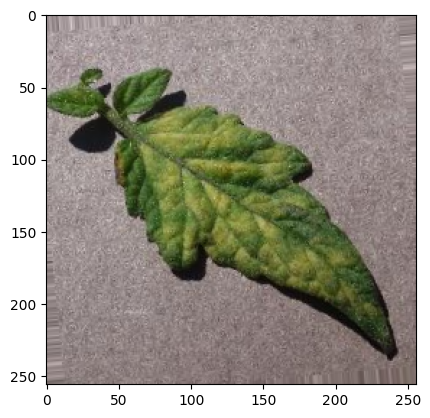

In [12]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = new_model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [13]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


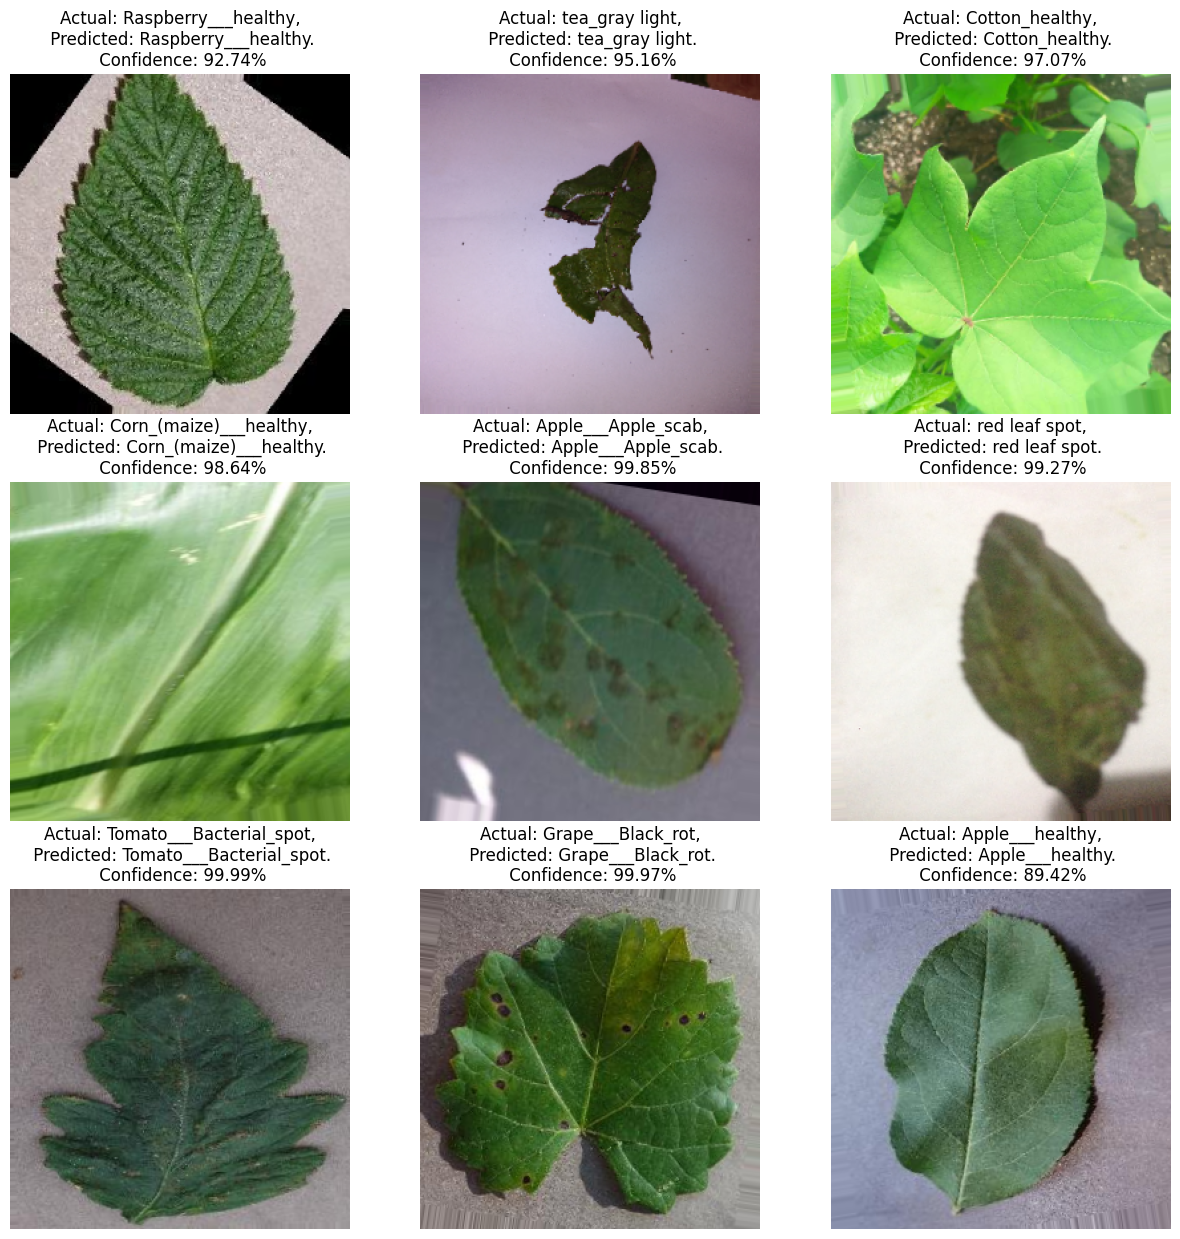

In [15]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(new_model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [40]:
model.save("crop2.h5")


In [ ]:
model.predict

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        "output\test",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
    
        class_mode="sparse"
)